<a href="https://colab.research.google.com/github/nagamamo/financial_data_science/blob/main/6_1_fx_swap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#[1]ライブラリの読み込み
import pandas as pd
import datetime
import matplotlib.pyplot as plt

In [ ]:
#[2]データ読込み
url = "https://github.com/nagamamo/data/blob/main/6_1_fx_swap_data.csv?raw=true"#Git-hubからCSVデータの入手
data = pd.read_csv(url)#データフレームの作成
data["Date"] = pd.to_datetime(data["Date"]) #日時をインデックスの変換のためdatetimeへ変換
df = data.set_index("Date")#日時をインデックスへ変更
data_list=['US1Y','JP1Y','spot'] #変数名再定義
df.columns = data_list
df.describe() #記述統計量の算出

In [ ]:
#[3]先物為替レート理論値の算出
day1=365#円金利を1年365日に定義
day2=360#ドル金利を1年360日に定義
df['fwd']=df.spot*(1+df.JP1Y/100*day1/365)/(1+df.US1Y/100*day2/365)#先物レートの算出
df.head()

Text(0, 0.5, 'JPY/USD')

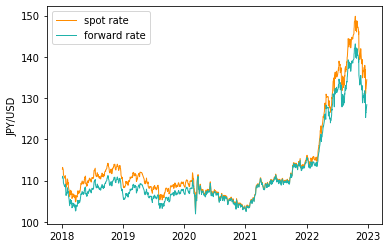

In [ ]:
#[4]可視化
plt.plot(df.spot, color = 'darkorange',label="spot rate",lw=1)
plt.plot(df.fwd, color = 'lightseagreen',label="forward rate",lw=1)
plt.legend()
plt.ylabel('JPY/USD')